In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [21]:
from cerebra_atlas_python.cerebra_mne import CerebraMNE
from cerebra_atlas_python.utils import setup_logging

In [4]:
setup_logging("DEBUG")

In [22]:
%%time
cerebra = CerebraMNE(config_path='../cerebra_atlas_python/config.ini')

CPU times: user 606 µs, sys: 4.85 ms, total: 5.45 ms
Wall time: 5.22 ms


In [25]:
cerebra.bem

 [INFO] 2024-03-27 23:11:36.77 mni_average - _set_bem: Generating boundary element model... | bem_0.33_0.0042_0.33_ico_4


<ConductorModel | BEM (3 layers) solver=mne>

In [ ]:
%%time
cerebra.src_space_points

AttributeError: 'CerebraMNE' object has no attribute '_src_space_points_path'

In [ ]:
%%time
cerebra.cerebra_sparse

AttributeError: 'CerebraMNE' object has no attribute '_cerebra_sparse_path'

In [ ]:
%time
cerebra.src_space_points

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.34 µs


AttributeError: 'CerebraMNE' object has no attribute '_src_space_points_path'

In [ ]:
cerebra.config_path

'../cerebra_atlas_python/config.ini'

In [ ]:
cerebra.src_space_mask

In [ ]:
cerebra.config_path

'../cerebra_atlas_python/config.ini'

In [ ]:
from cerebra_atlas_python import CerebrA
cerebra = CerebrA()
cerebra.orthoview(pt=[],plot_affine=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X (R)', ylabel='Y (A)', zlabel='Z (S)'>)

 [DEBUG] 2024-03-27 19:05:21.371 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:05:21.372 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:05:21.372 PngImagePlugin - call: STREAM b'tRNS' 101 15
 [DEBUG] 2024-03-27 19:05:21.372 PngImagePlugin - call: STREAM b'pHYs' 128 9
 [DEBUG] 2024-03-27 19:05:21.372 PngImagePlugin - call: STREAM b'IDAT' 149 374
 [DEBUG] 2024-03-27 19:05:21.377 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:05:21.377 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:05:21.378 PngImagePlugin - call: STREAM b'tRNS' 101 15
 [DEBUG] 2024-03-27 19:05:21.378 PngImagePlugin - call: STREAM b'pHYs' 128 9
 [DEBUG] 2024-03-27 19:05:21.378 PngImagePlugin - call: STREAM b'IDAT' 149 358
 [DEBUG] 2024-03-27 19:05:21.383 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:05:21.384 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:05:21.384 PngImagePlugin - call: STREAM b'tRNS'

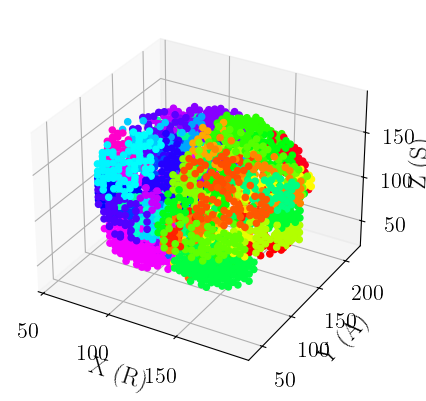

In [ ]:
cerebra.plot_3d()

 [DEBUG] 2024-03-27 19:03:32.365 utils - slice_volume: start_slice=126  end_slice=226  increment=1 


 [DEBUG] 2024-03-27 19:03:32.528 utils - slice_volume: start_slice=146  end_slice=246  increment=1 
 [DEBUG] 2024-03-27 19:03:32.631 utils - slice_volume: start_slice=109  end_slice=209  increment=1 


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

 [DEBUG] 2024-03-27 19:03:32.707 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:03:32.707 PngImagePlugin - call: STREAM b'PLTE' 41 45
 [DEBUG] 2024-03-27 19:03:32.708 PngImagePlugin - call: STREAM b'tRNS' 98 14
 [DEBUG] 2024-03-27 19:03:32.708 PngImagePlugin - call: STREAM b'pHYs' 124 9
 [DEBUG] 2024-03-27 19:03:32.708 PngImagePlugin - call: STREAM b'IDAT' 145 74
 [DEBUG] 2024-03-27 19:03:32.709 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:03:32.709 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:03:32.710 PngImagePlugin - call: STREAM b'tRNS' 101 15
 [DEBUG] 2024-03-27 19:03:32.710 PngImagePlugin - call: STREAM b'pHYs' 128 9
 [DEBUG] 2024-03-27 19:03:32.710 PngImagePlugin - call: STREAM b'IDAT' 149 143
 [DEBUG] 2024-03-27 19:03:32.711 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:03:32.712 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:03:32.712 PngImagePlugin - call: STREAM b'tRNS' 1

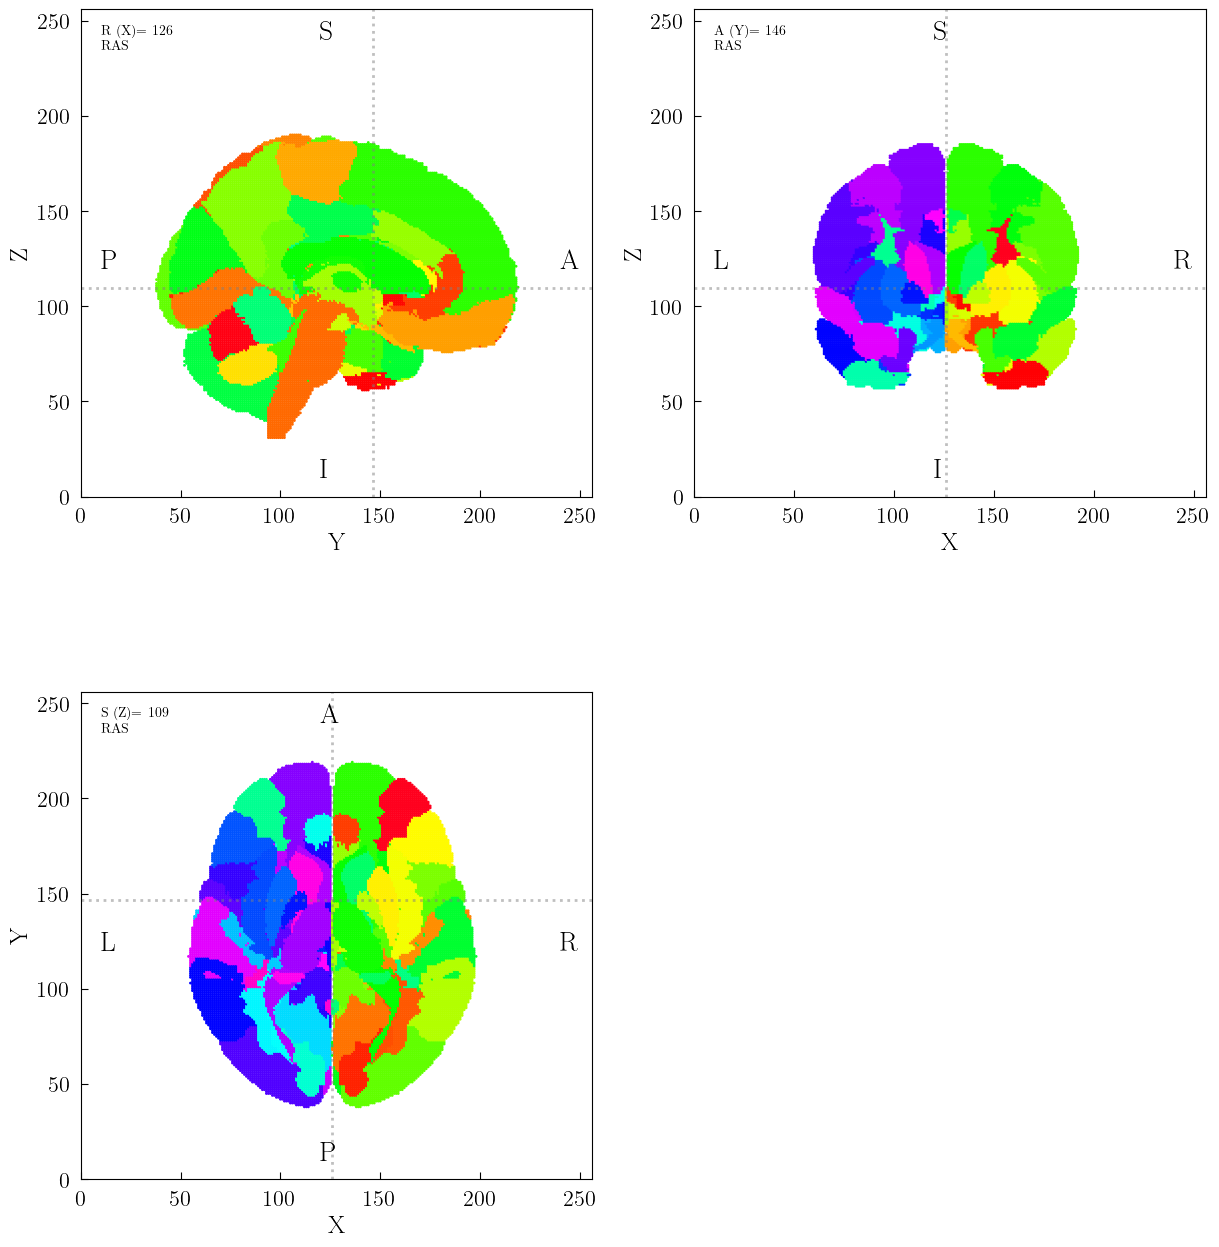

In [ ]:
cerebra.orthoview(plot_affine=True)

In [ ]:


import os
import os.path as op
import logging
from abc import ABC
import mne
from cerebra_atlas_python.config import Config
# from core.data.montage import get_info, get_montage


def get_forward(trans=None, src_space=None, bem=None, info=None, meg=False, eeg=True, n_jobs=-1):
    # if info is None:
    #     info = get_info()
    if (trans is None) or (src_space is None) or (bem is None):
        fs_dir = mne.datasets.fetch_fsaverage()
        trans_fif_path = os.path.join(fs_dir, 'bem', 'fsaverage-trans.fif')
        src_fif_path = os.path.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
        bem_fif_path = os.path.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

        if trans is None:
            logging.warning("trans not provided, using fsaverage")
            trans = trans_fif_path
        if src_space is None:
            logging.warning("src_space not provided, using fsaverage")
            # src = mne.setup_source_space(subject, spacing=sampling, surface='white',
            #                         subjects_dir=subjects_dir, add_dist=False,
            #                         n_jobs=-1)
            src_space = src_fif_path
        if bem is None:
            logging.warning("bem not provided, using fsaverage")
            bem = bem_fif_path

    fwd = mne.make_forward_solution(
                info,
                trans=trans,
                src=src_space,
                bem=bem,
                meg=meg,
                eeg=eeg,
                n_jobs=n_jobs,
            )

    return fwd


class Forward(Config, ABC):
    def __init__(self, **kwargs):
        self.forward_output_path: str = "./forward_models"
        self.fixed_ori: str = False
        self.meg: bool = False
        self.eeg: bool = True
        self.n_jobs: bool = -1
        self.save:bool = True
        self.montage_name: str = "GSN-HydroCel-129-downsample-111"
        self.head_size: float = 0.108

        Config.__init__(self,
            class_name=self.__class__.__name__,
            **kwargs,
        )

        # These attributes should be set by parent class before calling get_forward
        self.trans = None
        self.src_space = None
        self.bem = None

        self._info = None

        # Avoid recomputing/reloading fwd solution from disk
        self._cached_fwd = None
        self._cached_fwd_name = None

    def __str__(self):
        return f"{self.montage_name}-hs{self.head_size}"

    @property
    def file_name(self):
        return f"{self.forward_output_path}/{str(self)}-fwd.fif"


class CerebraForward(Forward):
    def __init__(self,cerebra=None,
        CerebraKwArgs=None,montage_name='GSN-HydroCel-129-downsample-109', head_size=0.1027,**kwargs):
        super().__init__(montage_name=montage_name,head_size=head_size,**kwargs)
        if cerebra is None:
            CerebraKwArgs = CerebraKwArgs or {}
            self.cerebra = CerebrA(**CerebraKwArgs)
        else:
            assert isinstance(
                cerebra, CerebrA
            ), f"Wrong class should be CerebrA {type(cerebra)= }"

    def __str__(self):
        return "cerebra-"+super().__str__()
    
    def set_info(self, info):
        self.info = info
    
    def get_forward(self):
        self.trans = self.cerebra.mni_average.head_mri_t
        self.src_space = self.cerebra.src_space
        self.bem = self.cerebra.mni_average.bem
        return super().get_forward()
    

In [ ]:
from cerebra_atlas_python.utils import setup_logging
setup_logging("DEBUG")

In [ ]:
cerebra.src_space

[autoreload of cerebra_atlas_python.mni_average failed: Traceback (most recent call last):
  File "/home/carlos/anaconda3/envs/cerebra/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/carlos/anaconda3/envs/cerebra/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/carlos/anaconda3/envs/cerebra/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/carlos/Carlos/cerebra_atlas_python

<SourceSpaces: [<discrete, n_used=31610>] MRI (surface RAS) coords, ~1.6 MB>

In [ ]:
fwd = mne.make_forward_solution(
            info,
            trans=trans,
            src=src_space,
            bem=bem,
            meg=meg,
            eeg=eeg,
            n_jobs=n_jobs,
        )

NameError: name 'info' is not defined

In [ ]:
cerebra_forward = CerebraForward(cerebra=cerebra)

In [ ]:
cerebra_forward.get_forward()

AttributeError: 'CerebraForward' object has no attribute 'cerebra'